***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
ds = pd.read_csv('./dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
ds.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
salario_minimo = 788
classes_renda = np.array([0, 2, 5, 15, 25, 1000]) * salario_minimo

classes_renda

array([     0,   1576,   3940,  11820,  19700, 788000])

### 2º Definir os labels das classes

In [5]:
labels_classes_renda = ['E', 'D', 'C', 'B', 'A']
labels_classes_renda

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
coluna_frequencia = pd.value_counts(
    pd.cut(
        x=ds['Renda'], 
        bins=classes_renda, 
        labels=labels_classes_renda, 
        include_lowest=True
    )
)
coluna_frequencia.head()

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
coluna_frequencia_percentual = (pd.value_counts(
    pd.cut(
        x=ds['Renda'], 
        bins=classes_renda, 
        labels=labels_classes_renda, 
        include_lowest=True
    ),
    normalize=True
) * 100).round(2)
coluna_frequencia_percentual

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
ds_frequencia_renda = pd.DataFrame(data={
    'Frequencia': coluna_frequencia,
    'Porcentagem(%)': coluna_frequencia_percentual
})
ds_frequencia_renda.sort_index(inplace=True, ascending=False)
ds_frequencia_renda

,Frequencia,Porcentagem(%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

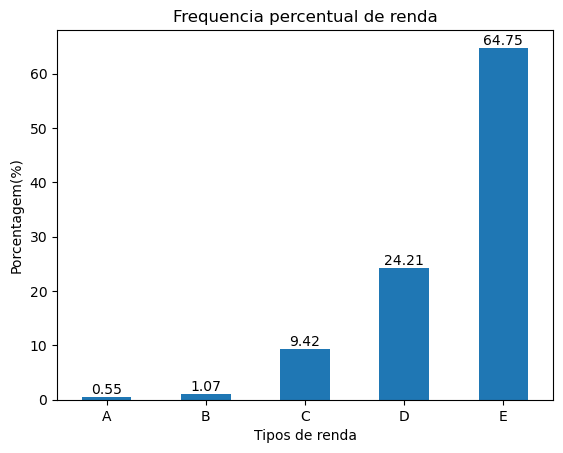

In [9]:
ax = ds_frequencia_renda['Porcentagem(%)'].plot.bar()
ax.set_title('Frequencia percentual de renda')
ax.tick_params(axis='x', labelrotation = 0)
ax.set_xlabel('Tipos de renda')
ax.set_ylabel('Porcentagem(%)')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

> ### Conclusões

Existe uma grande diferença de extremos na renda da população considerada. Com a maior parte da população considerada (**64,75**) tendo uma renda de classe **E**, ou seja, de 0 a 2 Salarios Mínimos (**R$ 788,00** na época).  

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [10]:
ds.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


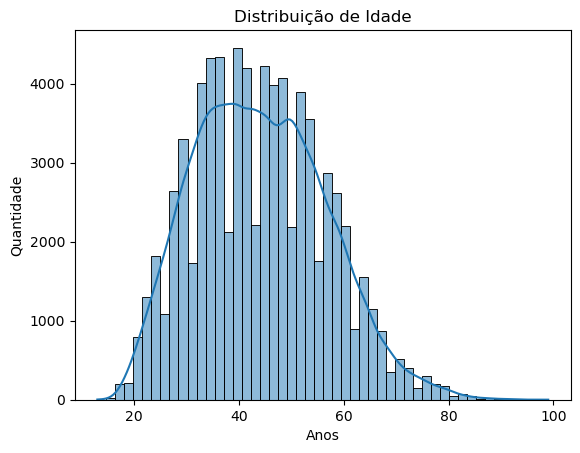

In [11]:
ax = sns.histplot(ds['Idade'], bins=50, kde=True)
ax.set_title('Distribuição de Idade')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Anos')

plt.show()

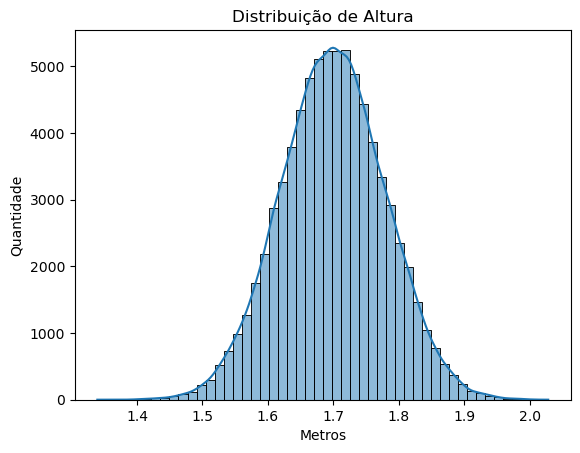

In [12]:
ax = sns.histplot(ds['Altura'], bins=50, kde=True)
ax.set_title('Distribuição de Altura')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Metros')

plt.show()

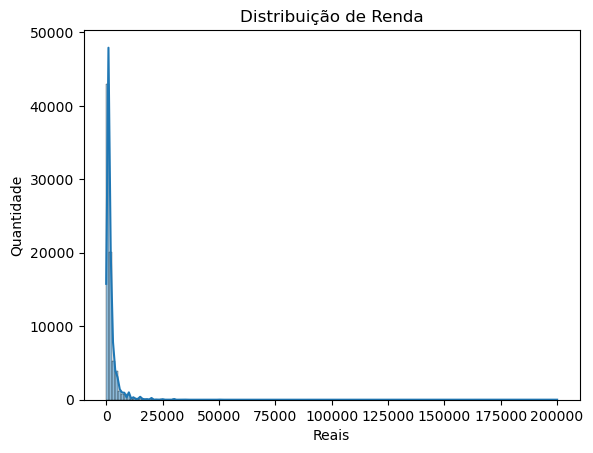

In [13]:
ax = sns.histplot(ds['Renda'], bins=150, kde=True)
ax.set_title('Distribuição de Renda')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Reais')

plt.show()

> ### Conclusões

Ambas variáveis Renda e Idade, tem uma asimetria à Direita, o que mostra uma ocorrência maior de valores menores.  
Porém, com ajuda dos graficos podemos notar uma assimetria muito maior na variável renda, onde a contagem de ocorrências de valores menores é muito maior que os valores maiores.  
A variável Idade possui uma disperção menor que Renda, significando uma distribuição mais uniforme que a Renda.  
A variável Altura é simétrica, ou seja, possui uma distribuição uniforme, favoreçendo valores medianos.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

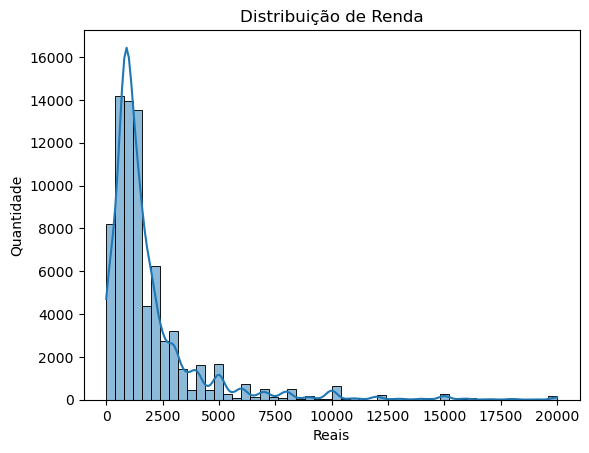

In [14]:
ax = sns.histplot(ds.query('Renda <= 20000')['Renda'], bins=50, kde=True)
ax.set_title('Distribuição de Renda')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Reais')

plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:
cruzamento_sexo_cor = (pd.crosstab(ds['Sexo'], ds['Cor'],normalize=True)*100).round(2)
cruzamento_sexo_cor

Cor,0,2,4,6,8
Sexo,,,,,
0,0.33,28.88,7.16,0.31,32.62
1,0.13,12.52,3.76,0.15,14.14


In [17]:
cruzamento_sexo_cor.rename(index=sexo, columns=cor, inplace=True)
cruzamento_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

Analizando as porcentagens, é possível concluir que **grande parte da população considerada** (Responsáveis pelos domicílios) são **Homens Pardos**, e a **menor parte** são **Mulheres Indígenas**

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
round(ds['Renda'].mean(), 2)

2000.38

### Obtenha a mediana

In [19]:
ds['Renda'].median()

1200.0

### Obtenha a moda

In [20]:
ds['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [21]:
round(ds['Renda'].mad(), 2)

1526.5

### Obtenha a variância

In [22]:
round(ds['Renda'].var(), 2)

11044906.01

### Obtenha o desvio-padrão

In [23]:
round(ds['Renda'].std(), 2)

3323.39

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
renda_cross_sexo_cor = (
    pd.crosstab(
        ds['Sexo'], 
        ds['Cor'],
        aggfunc=['mean','median', 'max'],
        values=ds['Renda']
        )
    ).round(2).rename(
        index=sexo, 
        columns=cor
    ).rename(
        columns={
            'max':'Valor Maximo', 
            'median':'Mediana', 
            'mean':'Media'
        }
    )
renda_cross_sexo_cor

Media                                      Mediana          \
Cor       Indígena   Branca    Preta  Amarela    Parda Indígena  Branca   
Sexo                                                                      
Masculino  1081.71  2925.74  1603.86  4758.25  1659.58    797.5  1700.0   
Feminino   2464.39  2109.87  1134.60  3027.34  1176.76    788.0  1200.0   

                                  Valor Maximo                                 
Cor         Preta Amarela   Parda     Indígena  Branca  Preta Amarela   Parda  
Sexo                                                                           
Masculino  1200.0  2800.0  1200.0        10000  200000  50000   50000  100000  
Feminino    800.0  1500.0   800.0       120000  100000  23000   20000   30000

> ### Conclusões

Como vimos anteriormente, é possivel entender que a Média das rendas podem não ser consideradas uma métrica que representa bem a tendência geral, já que existe uma grande diferença entre extremos nos dados trabalhados.

Ao analizar os dados nas tabelas, podemos ver que **Homens Brancos** possuem o **maior Valor Máximo**, a segunda maior Mediana, ou seja, pessoas desta cor e sexo possuem mais chance de ter renda maior que as outras combinações de Sexo e Cor.  
**Homens Indigenas**, no entanto, possuem o **menor Valor Máximo** e a segunda menor Mediana, o que indica que pessoas desta cor e sexo possuem grande chance de conseguir uma renda menor

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [25]:
renda_cross_sexo_cor = (
    pd.crosstab(
        ds['Sexo'], 
        ds['Cor'],
        aggfunc=['mad', 'var', 'std'],
        values=ds['Renda']
        )
    ).round(2).rename(
        index=sexo, 
        columns=cor
    ).rename(
        columns={
            'mad':'Desvio Médio Absoluto', 
            'var':'Variância', 
            'std':'Desvio Padrão'
        }
    )

> ### Conclusões

Ao estudar estes dados, podemos ver que a distribuição de renda de **Homens Indígenas** e **Mulheres Pardas** são as **mais proximas a um valor médio** das correlações estudadas.  
Também é possível ver que a renda de **Homens Amarelos** e **Homens Brancos** são as que **possuem mais variação de renda** das outras correlações

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [26]:
list(sexo.values())

['Masculino', 'Feminino']

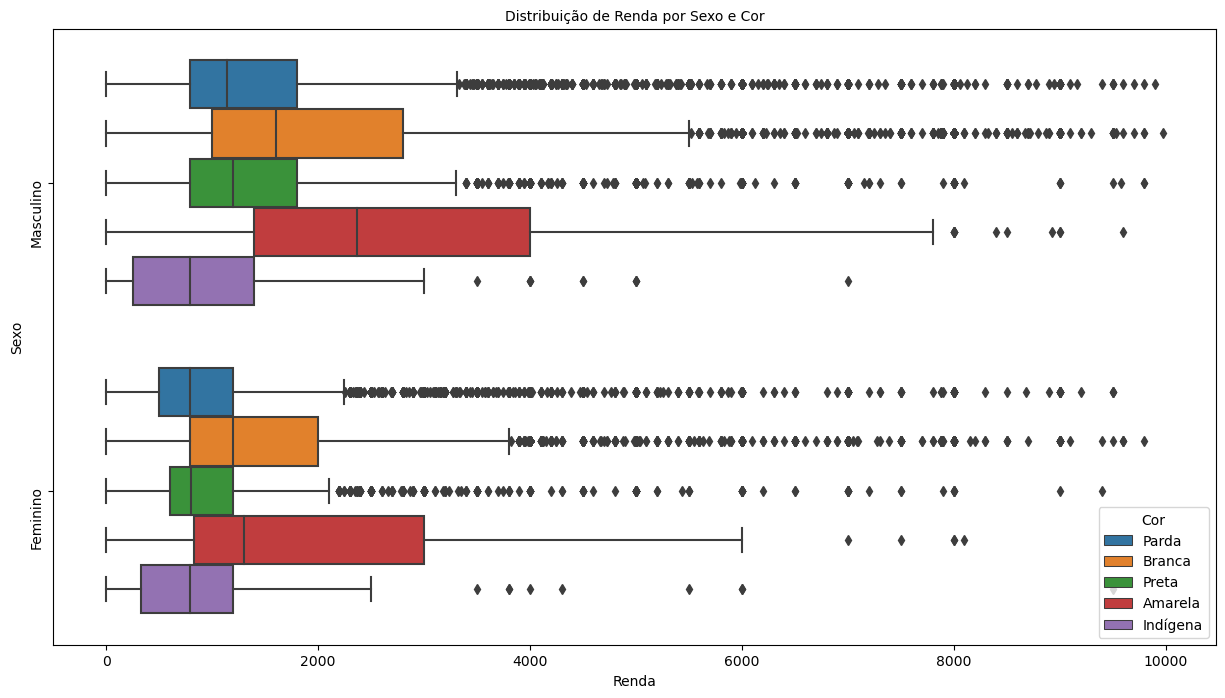

In [27]:
ax = sns.boxplot(
    x='Renda', 
    y='Sexo',
    hue='Cor', 
    data=ds.query('Renda < 10000').replace({'Cor':cor}),  
    orient='h'
)

ax.figure.set_size_inches(15, 8)
ax.set_title('Distribuição de Renda por Sexo e Cor', fontsize=10)
ax.set_yticklabels((sexo.values()),rotation=90)

plt.show()

> ### Conclusões

Atravéz do gráfico é possivel notar que **Homens tem uma tendencia a ter uma Renda maior que Mulheres**.  
Podemos observar que **pessoas de cor Amarela possuem uma variedade maior de renda** que qualquer outra cor.  
Também podemos notar que **pessoas de cor Branca e Parda, possuem uma quantidade maior de Outliers que as outras cores**, ou seja, **existem mais pessoas com renda maior que o normal nessas duas categorias de cores**

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [28]:
from scipy import stats

stats.percentileofscore(ds['Renda'],788.00)

24.390942217595

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [29]:
ds['Renda'].quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [30]:
renda_cross_sexo_anos_estudo = (
    pd.crosstab(
        ds['Anos de Estudo'],
        ds['Sexo'], 
        aggfunc=['mean', 'median', 'max', 'std'],
        values=ds['Renda']
        )
    ).round(2).rename(
        index=anos_de_estudo, 
        columns=sexo
    ).rename(
        columns={
            'mean':'Média', 
            'median':'Mediana', 
            'max':'Valor Máximo',
            'std':'Desvio Padrão'
        }
    )
renda_cross_sexo_anos_estudo

Média            Mediana           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                               Valor Máximo          Desvio Padrão           
Sexo                              Masculino Feminino     Masculino Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano        30000    10000       1023.90   639.31  
1 ano                                 30000     2000       1331.95   425.29  
2 anos                                40000     4000       1435.17   498.23  
3 anos                                80000     3500       2143.80   424.12  
4 anos                                50000    10000       1419.82   629.55  
5 anos                                35000     8000       1484.65   635.78  
6 anos                                25000     6000       1476.63   574.55  
7 anos                                40000     9000       1419.71   602.04  
8 anos                                30000    18000       1515.58   896.78  
9 anos                                60000    20000       2137.66   973.22  
10 anos                               45000     6000       2078.61   620.61  
11 anos                              200000   100000       2676.54  1819.04  
12 anos                               30000   120000       2268.08  4851.83  
13 anos                               25000    20000       2797.12  2053.79  
14 anos                               50000    20000       3987.21  2064.08  
15 anos ou mais                      200000   100000       7447.61  4212.77  
Não determinados                       7000     3000        979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

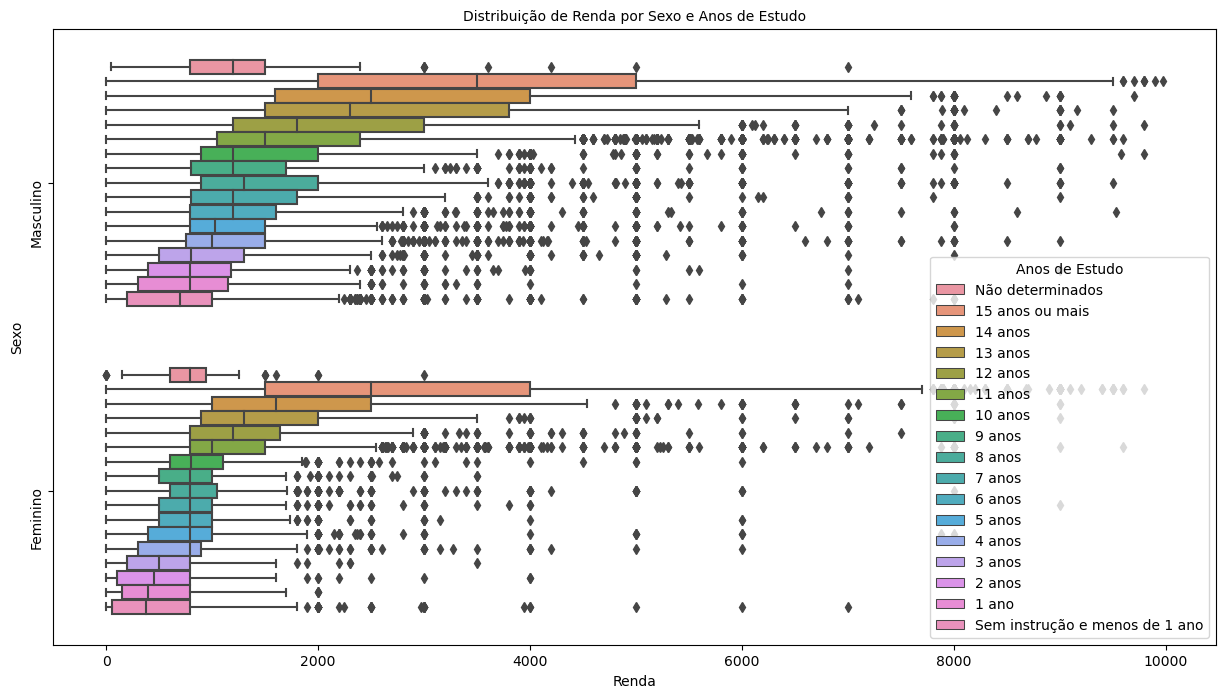

In [31]:
ax = sns.boxplot(
    x='Renda', 
    y='Sexo',
    hue='Anos de Estudo', 
    data=ds.query('Renda < 10000').sort_values('Anos de Estudo',ascending=False).replace({'Anos de Estudo':anos_de_estudo}),  
    orient='h'
)

ax.figure.set_size_inches(15, 8)
ax.set_title('Distribuição de Renda por Sexo e Anos de Estudo', fontsize=10)
ax.set_yticklabels((sexo.values()),rotation=90)

plt.show()

> ### Conclusões

Analizando o grafico, é possivel concluir que, **a renda de pessoas com 15 anos ou mais de estudo, possuem renda distribuida entre um intervalo que abrange valores maiores que quaisquer outra medida de anos de estudo**.  
Também é possível ver que **pessoas sem instrução e menos de 1 ano de estudo, possuem a renda distribuida entre um intervalo de valores menores que qualquer classificação de anos de estudo**.  
Em geral é possível observar uma **escala proporcional entre anos de estudo e a probabilidade de uma renda maior**

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [32]:
ds.groupby(['UF']).agg({'Renda':['mean','median','max','std']}).round(2).rename(index=uf).sort_index()

Renda                         
                        mean  median     max      std
UF                                                   
Acre                 1506.09   900.0   30000  2276.23
Alagoas              1144.55   788.0   11000  1237.86
Amapá                1861.35  1200.0   15580  2020.69
Amazonas             1445.13   900.0   22000  1757.94
Bahia                1429.65   800.0  200000  3507.92
Ceará                1255.40   789.0   25000  1821.96
Distrito Federal     4241.95  2000.0  100000  5550.46
Espírito Santo       2026.38  1274.0  100000  3513.85
Goiás                1994.58  1500.0   30000  2221.93
Maranhão             1019.43   700.0   30000  1887.82
Mato Grosso          2130.65  1500.0   35000  2542.63
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Minas Gerais         2056.43  1200.0  100000  3584.72
Paraná               2493.87  1500.0  200000  4302.94
Paraíba              1293.37   788.0   30000  1950.27
Pará                 1399.08   850.0   50000  2053.78
Pernambuco           1527.08   900.0   50000  2389.62
Piauí                1074.55   750.0   40000  2373.36
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Rio de Janeiro       2496.40  1400.0  200000  5214.58
Rondônia             1789.76  1200.0   50000  2406.16
Roraima              1783.59  1000.0   20000  2079.66
Santa Catarina       2470.85  1800.0   80000  3137.65
Sergipe              1109.11   788.0   16000  1479.00
São Paulo            2638.10  1600.0   80000  3503.78
Tocantins            1771.09  1000.0   60000  2934.59

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

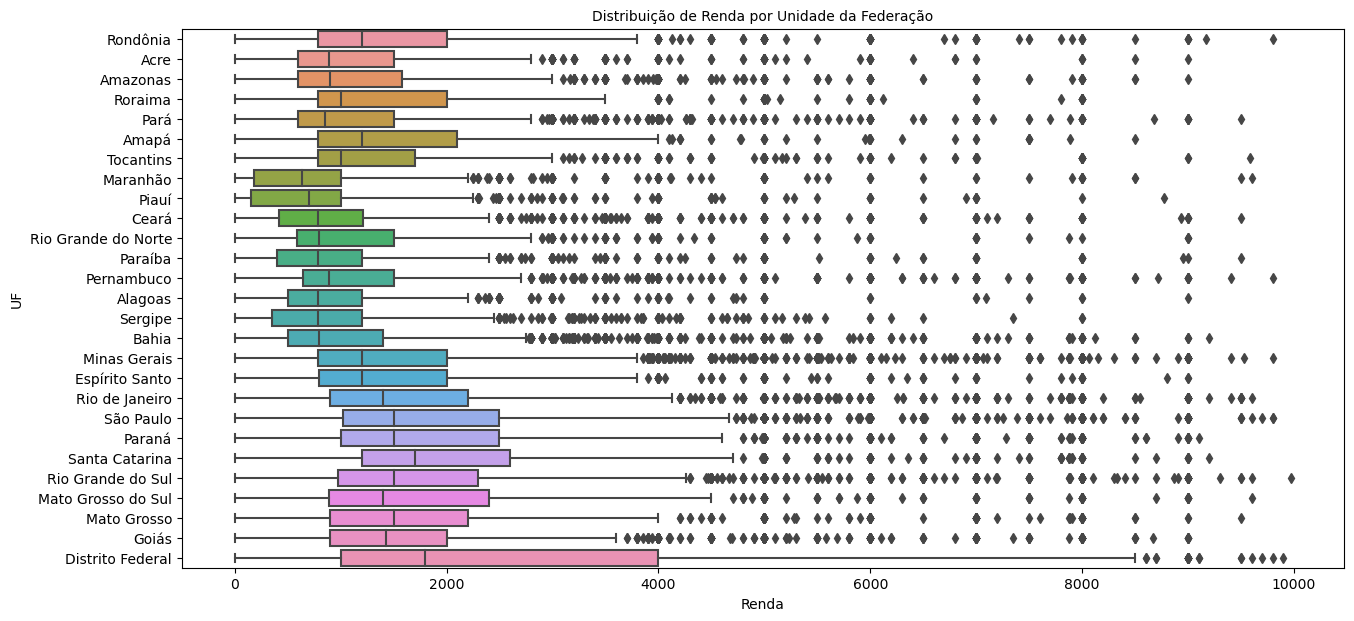

In [33]:
ax = sns.boxplot(
    x='Renda', 
    y='UF',
    data=ds.query('Renda < 10000'),  
    orient='h'
)

ax.figure.set_size_inches(15, 7)
ax.set_title('Distribuição de Renda por Unidade da Federação', fontsize=10)
ax.set_yticklabels((uf.values()))

plt.show()

> ### Conclusões

Com base no grafico podemos perceber uma distribuição de renda bem similar entre a maior parte dos estados, exceto o Distrito Federal, onde é possivel ver que existem rendas com valores maiores que o resto das unidades da federação